# Functions

## What are functions?

Functions are reusable blocks of code that perform a specific task. They help streamline your code by allowing you to avoid repetition, improve readability, and make maintenance easier.

The general syntax for defining a function is the following:

```python
def function_name(parameter_1, ..., parameter_n):
    """Docstring"""
    <body of the function>
    return value  # Depending on the function
```

In [1]:
# Example 1: one-line docstring, no parameters, no return value
def greet():
    """Print a greeting message."""
    print("Hello, welcome to the class!")

In [5]:
greet()

Hello, welcome to the class!


In [2]:
# Example 2: multi-line docstring, parameters, and return value
def calculate_area(radius):
    """
    Calculate the area of a circle given its radius.
    
    Args:
        radius (float): The radius of the circle.
        
    Returns:
        float: The area of the circle, calculated as π * radius^2.
    """
    area = 3.14159 * radius ** 2
    return area

In [ ]:
for radius in [1,2,3]:
    area = calculate_area(radius)
    print(f"The are of a circle with radius {radius} is {area:.2f}") # .2f rounds decimal number in print statement

The are of a circle with radius 1 is 3.14
The are of a circle with radius 2 is 12.57
The are of a circle with radius 3 is 28.27


## Data loading and preparation

We'll practice creating functions using the same datasets from last week.

In [128]:
import os
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# --------------------------------------------------
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants = power_plants.drop(columns='Unnamed: 0') # Drop first column

# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)
states.columns = states.columns.str.lower()

# --------------------------------------------------
# Create geometry column for power plants
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Convert power plants DataFrame to GeoDataFrame
power_plants = gpd.GeoDataFrame(power_plants,      # Data
                                geometry=points,   # Specify geometry column
                                crs='EPSG:4269'    # Specify CRS
                                )


## Exercise: CA top power plant sources map

Last week we solved the followinge exercise to use a `for` with a `zip` to create subplots of the top 3 power plant sources in California.

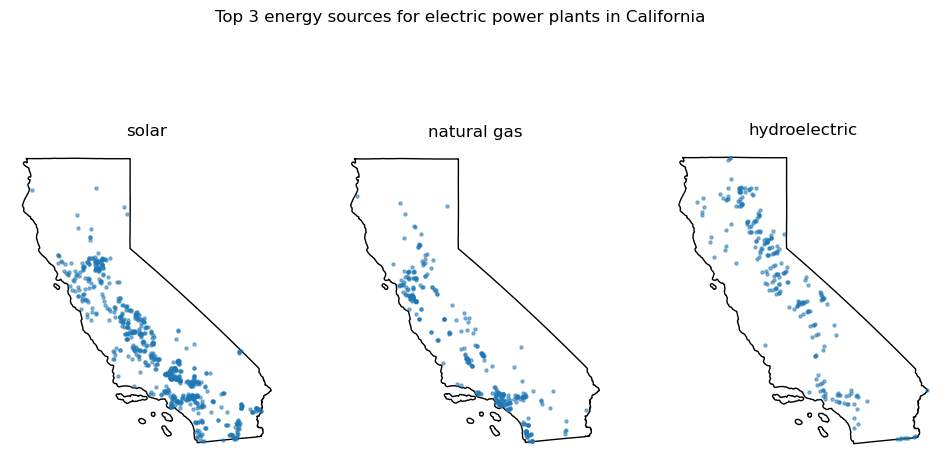

In [4]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = ['solar', 'natural gas', 'hydroelectric']

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Steps to create a function

Recommended steps for writing a function:

1. Solve the problem for a specific example
2. Identify which parts of the code need to be generalized and update these parts.
3. Wrap this into a function.
4. Add additional parameters or assert statements
5. Test function
6. Add docstring

Example: We want to obtain the top 3 power sources for any state programatically as a function.

### Step 1: Solve for a specific example

Example: Solve this for CA

In [ ]:
state_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = (state_power_plants['primsource']
               .value_counts().
               index[:3].
               tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 2: Identify parts of the code that need to be generalized

In [ ]:
# Can generalize state name
state = 'California'
state_power_plants = power_plants[power_plants['state'] == state]
top_sources = (state_power_plants['primsource']
               .value_counts().
               index[:3].
               tolist())
top_sources

['solar', 'natural gas', 'hydroelectric']

## Step 3: Define the function
and
## Step 4: Adjust our parameters

In [16]:
# What you generalized becomes your argument

def top3_sources(state, power_plants):
    state_power_plants = power_plants[power_plants['state'] == state]
    top_sources = (state_power_plants['primsource']
                .value_counts().
                index[:3].
                tolist())
    return top_sources

# Generally, we don't want to assume that things inside of function exist outside of it (like power_plants df); "global variables"

In [17]:
top3_sources('Connecticut', power_plants)

['solar', 'natural gas', 'petroleum']

## Example

Create a function that will produce a plot given a list of primary sources and a state name. (Recreate the previous plot for any state).

## Step 1: Solve an example

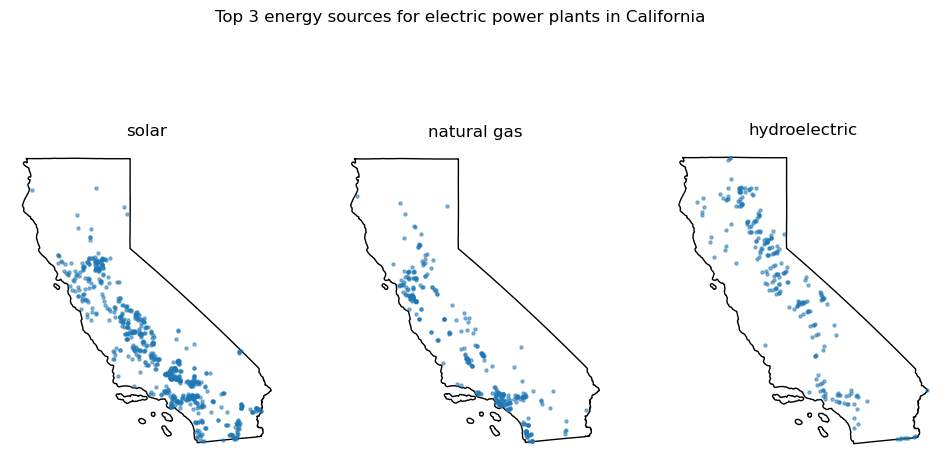

In [18]:
# Select CA power plants and boundary
ca_power_plants = power_plants[power_plants['state'] == 'California']
ca_boundary = states[states['name'] == 'California']

# CA top 3 power sources were previously given
ca_top_sources = top3_sources('California', power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, ca_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    ca_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in California")    
plt.show()

## Step 2: Which parts of the code need to be generalized

Anything where CA is used specifically

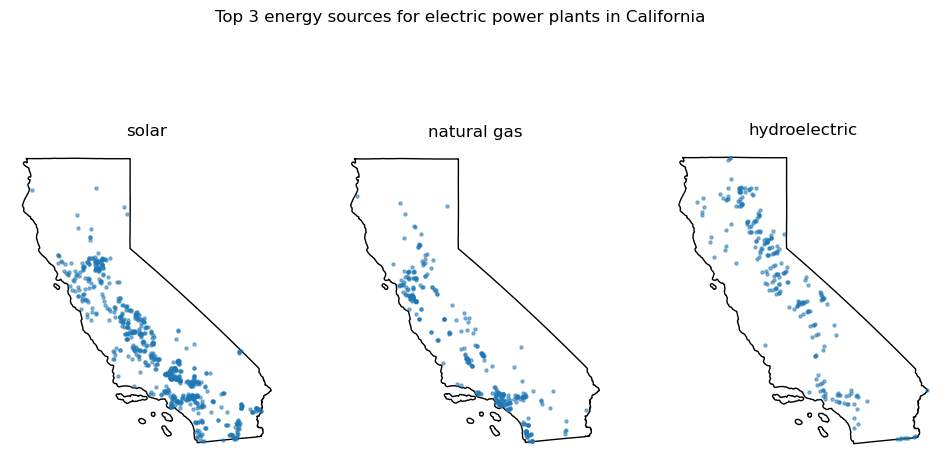

In [30]:
state = 'California'

# Select state power plants and boundary
state_power_plants = power_plants[power_plants['state'] == state]
state_boundary = states[states['name'] == state]

# State top 3 power sources were previously given
state_top_sources = top3_sources(state, power_plants)

# Create subplots for each top source in a single figure
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

    axis.set_title(source)
    axis.axis('off')

    state_boundary.plot(ax=axis,
                     color='none')
    
    # Subset power plants by source and plot
    source_subset = state_power_plants[state_power_plants['primsource'] == source]
    source_subset.plot(ax=axis,
                    markersize=5,
                    alpha=0.5)

plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
plt.show()

## Step 3: 

In [28]:
def plot_top3_power_sources(state, power_plants, states):
    # Select state power plants and boundary
    state_power_plants = power_plants[power_plants['state'] == state]
    state_boundary = states[states['name'] == state]

    # State top 3 power sources were previously given
    state_top_sources = top3_sources(state, power_plants)

    # Create subplots for each top source in a single figure
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)
    for axis, source in zip(ax, state_top_sources):   # Iterate over subplots and energy sources

        axis.set_title(source)
        axis.axis('off')

        state_boundary.plot(ax=axis,
                        color='none')
        
        # Subset power plants by source and plot
        source_subset = state_power_plants[state_power_plants['primsource'] == source]
        source_subset.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 energy sources for electric power plants in {state}")    
    plt.show()

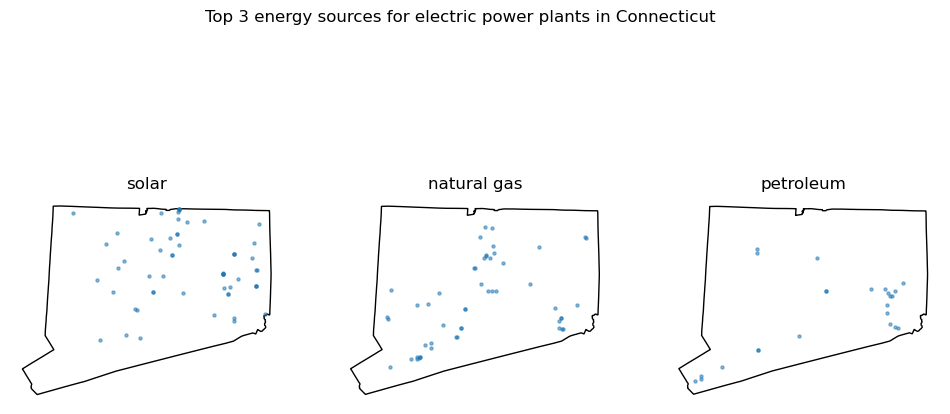

In [29]:
plot_top3_power_sources('Connecticut', power_plants, states)

#### Creating function to find top 3 states for each energy source

In [ ]:
# Find top three states for wind as primary energy source 
wind = power_plants[power_plants['primsource'] == 'wind']
top_states = wind['state'].value_counts().index[:3].tolist()
top_states

['Texas', 'Minnesota', 'Iowa']

In [114]:
# Making it into a function with argument pwr_source

pwr_source = 'wind'

def top3_states(pwr_source, power_plants):
    pwr_plant_source = power_plants[power_plants['primsource'] == pwr_source]
    top_states = pwr_plant_source['state'].value_counts().index[:3].tolist()
    return top_states

In [113]:
# Testing function
top_states = top3_states('wind', power_plants)

top_states

['Texas', 'Minnesota', 'Iowa']

### How do I find each state's power plant info, to plot it?

In [ ]:
# Creating data frame with pwr_source of choice
pwr_source_plants = power_plants[power_plants['primsource'] == 'wind']

# Subsetting based on a state (one of top_states)
pwr_source_plants_state = pwr_source_plants[pwr_source_plants['state'] == 'Texas']

pwr_source_plants_state.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
3491,15061,54979,Big Spring Wind Power Facility,2770,Terra-Gen Operating Co-Wind,IPP Non-CHP,3300 South Moss Lake Rd,Big Spring,Howard,Texas,79720.0,wind,Wind = 34.3 MW,Onshore Wind Turbine,34.3,34.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-101.388333,32.2075,POINT (-101.38833 32.20750)
3811,15380,55579,Llano Estacado Wind Ranch,62136,Llano Estacado Wind Ranch,IPP Non-CHP,Unnammed road,White Deer,Carson,Texas,79097.0,wind,Wind = 80 MW,Onshore Wind Turbine,80.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-101.253300,35.4677,POINT (-101.25330 35.46770)
3812,15381,55581,King Mountain Wind Ranch 1,6354,FPL Energy Upton Wind LP,IPP Non-CHP,120 E. 5th Street,McCamey,Upton,Texas,79752.0,wind,Wind = 278 MW,Onshore Wind Turbine,278.0,278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-102.241700,31.2092,POINT (-102.24170 31.20920)


In [ ]:
# Function! 

def plot_top3_states(pwr_source, power_plants, states):

    # Create list of top states for power source
    top_states = top3_states(pwr_source, power_plants)

    # Initialize plot
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)

    # Iterate over subplots and top states
    for axis, state in zip(ax, top_states):   

        axis.set_title(state)                # axis title = state
        axis.axis('off')

        # Extract state boundary and plot
        state_boundary = states[states['name'] == state]     
        state_boundary.plot(ax=axis,                         
                        color='none')
        
        # Subset power plant info by power source
        pwr_source_plants = power_plants[power_plants['primsource'] == pwr_source]
        pwr_source_plants_state = pwr_source_plants[pwr_source_plants['state'] == state]   
        
        # Plot power plant info
        pwr_source_plants_state.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 U.S. states by number of {pwr_source}-powered electric plants")    
    plt.show()

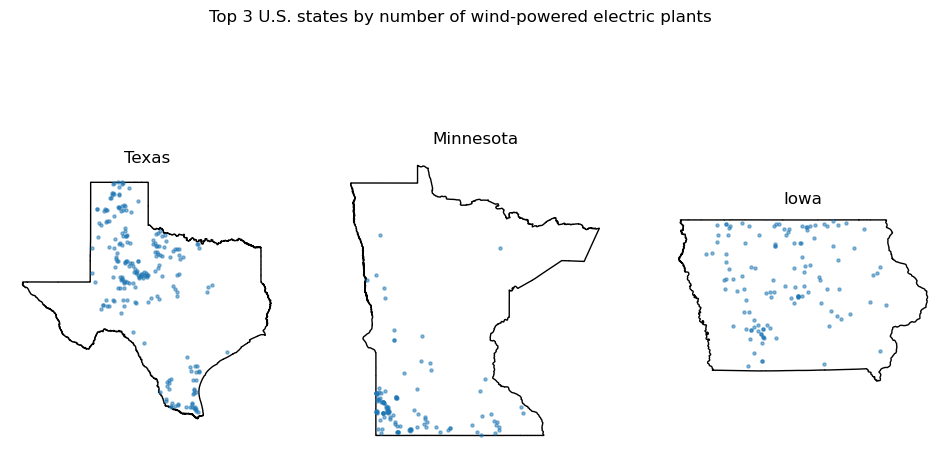

In [134]:
plot_top3_states('wind', power_plants, states)

In [ ]:
# Function copy just in case :)


def plot_top3_states(pwr_source, power_plants, states):

    # Create list of top states for power source
    top_states = top3_states(pwr_source, power_plants)

    # Initialize plot
    fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=3)

    # Iterate over subplots and top states
    for axis, state in zip(ax, top_states):   

        axis.set_title(state)                # axis title = state
        axis.axis('off')

        state_boundary = states[states['name'] == state]
        state_boundary.plot(ax=axis,
                        color='none')
        
        pwr_source_plants = power_plants[power_plants['primsource'] == 'wind']
        pwr_source_plants_state = pwr_source_plants[pwr_source_plants['state'] == state]
        
        # Subset power plants by source and plot
        source_subset = ca_power_plants[ca_power_plants['primsource'] == source]
        pwr_source_plants_state.plot(ax=axis,
                        markersize=5,
                        alpha=0.5)

    plt.suptitle(f"Top 3 U.S. states by number of {pwr_source}-powered electric plants")    
    plt.show()